In [1]:
%matplotlib

Using matplotlib backend: MacOSX


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import math

g=9.8067

def F(m,l,phi1,phi2,p1,p2):
    c=math.cos(phi1-phi2)
    s=math.sin(phi1-phi2)
    d=1/(1+s*s)
    a=1/(m*l*l)
    f1=a*d*(p1-p2*c)
    f2=a*d*(2*p2-p1*c)
    x=-p1*p2*s+d*(p1*p1+2*p2*p2-2*p1*p2*c)*c*s
    f3=a*d*x-2*m*g*l*math.sin(phi1)
    f4=-a*d*x-m*g*l*math.sin(phi2)
    return np.array([f1,f2,f3,f4])


def RK4_dp(m,l,phi1,phi2,p1,p2,h):
    Y1=np.array([phi1,phi2,p1,p2])
    F1=F(m,l,phi1,phi2,p1,p2)
    Y2=Y1+0.5*h*F1
    F2=F(m,l,Y2[0],Y2[1],Y2[2],Y2[3])
    Y3=Y1+0.5*h*F2
    F3=F(m,l,Y3[0],Y3[1],Y3[2],Y3[3])
    Y4=Y1+h*F3
    F4=F(m,l,Y4[0],Y4[1],Y4[2],Y4[3])
    return (Y1+h*(F1+2*(F2+F3)+F4)/6)

h=0.001
N=60000
m=1
l=1
n=0

phi1=0.0
phi2=0.0
p1=4.0
p2=2.0

pp=np.array([phi1,phi2,p1,p2])

res=[pp]

while(n<N):
    n=n+1
    pp=RK4_dp(m,l,pp[0],pp[1],pp[2],pp[3],h)
    res.append(pp)

#convert to numpy array at the end, since append is much faster than numpy's version
res=np.array(res)
time=np.linspace(0,n*h,N+1)

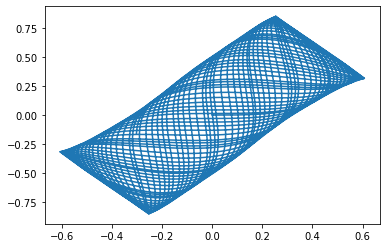

In [11]:
plt.plot(res[:,0],res[:,1])
plt.show()

In [12]:
x1=l*np.sin(res[:,0])
z1=2*l-l*np.cos(res[:,0])

x2=x1+l*np.sin(res[:,1])
z2=z1-l*np.cos(res[:,1])

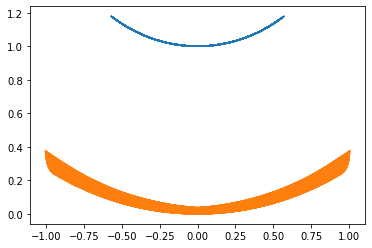

In [13]:
plt.plot(x1,z1)
plt.plot(x2,z2)
plt.show()

In [7]:
from matplotlib import animation, rc
from IPython.display import HTML

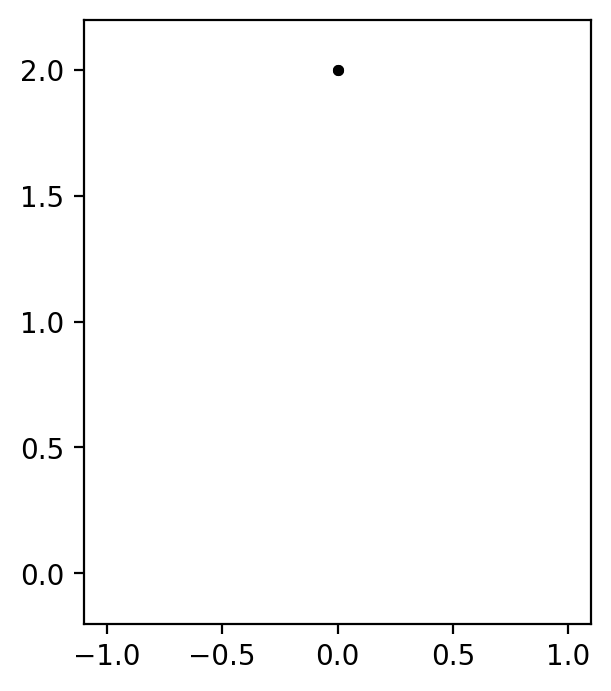

In [14]:
fig, ax = plt.subplots()

fig.dpi=200

ax.set_xlim((-1.1, 1.1))
ax.set_ylim((-0.2, 2.2))
ax.set_aspect(2.4/2.2)

line1, = ax.plot([], [], 'g',lw=2)
line2, = ax.plot([], [], 'r',lw=2)
pline, = ax.plot([], [], 'b',lw=3)
fixpt, = ax.plot([0,0], [2*l,2*l], 'ko',ms=3)
mpts,  = ax.plot([], [], 'co',ms=8)

In [15]:
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    pline.set_data([], [])
    fixpt.set_data([0,0], [2*l,2*l])
    mpts.set_data([], [])
    return (line1,line2,pline,fixpt,mpts)

ainc=25
tracelen=30

def animate(i):
    spt=ainc*i
    ept=spt+ainc*tracelen
    line1.set_data(x1[spt:ept:ainc], z1[spt:ept:ainc])
    line2.set_data(x2[spt:ept:ainc], z2[spt:ept:ainc])
    pline.set_data([0,x1[ept],x2[ept]], [2*l,z1[ept],z2[ept]])
    mpts.set_data([x1[ept],x2[ept]], [z1[ept],z2[ept]])
    return (line1,line2,pline,fixpt,mpts)

#make sure that ainc*(frames+tracelen)<N
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=2000, interval=20, 
                               blit=True)

In [16]:
HTML(anim.to_html5_video())